In [1]:
import os
import zipfile
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import seaborn as sns

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.3.1


In [2]:
#!wget --no-check-certificate \
    #https://storage.googleapis.com/laurencemoroney-blog.appspot.com/fcnn-dataset.zip \
    #-O /tmp/fcnn-dataset.zip

In [3]:

# extract the downloaded dataset to a local directory: /tmp/fcnn
local_zip = '/tmp/fcnn-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/fcnn')
zip_ref.close()

In [2]:
# pixel labels in the video frames
class_names = ['sky', 'building','column/pole', 'road', 'side walk', 'vegetation', 'traffic light', 'fence', 'vehicle', 'pedestrian', 'byciclist', 'void']

# Telling where is the directory of file

In [3]:
train_dataset_path, train_dataset_label_path = ('/tmp/fcnn/dataset1/images_prepped_train/','/tmp/fcnn/dataset1/annotations_prepped_train/')

validation_dataset_path, validation_dataset_label_path = ('/tmp/fcnn/dataset1/images_prepped_test/','/tmp/fcnn/dataset1/annotations_prepped_test/')

#- we need the data as a list
#- and then tensor flow dataset


from preprocess_data import get_dataset_slice_path

train_dataset_path, train_dataset_label_path = get_dataset_slice_path(
train_dataset_path, train_dataset_label_path)


validation_dataset_path, validation_dataset_label_path = get_dataset_slice_path(validation_dataset_path, validation_dataset_label_path )

validation_dataset_path[0:4]       

['/tmp/fcnn/dataset1/images_prepped_test/0016E5_08125.png',
 '/tmp/fcnn/dataset1/images_prepped_test/0016E5_08089.png',
 '/tmp/fcnn/dataset1/images_prepped_test/0016E5_08071.png',
 '/tmp/fcnn/dataset1/images_prepped_test/0016E5_08041.png']

- Now we have our dataset however we need image not data so we
need to convert them before putting it in training dataset

In [4]:
from preprocess_data import map_filename_to_image_and_mask


training_dataset = tf.data.Dataset.from_tensor_slices((train_dataset_path, train_dataset_label_path))

#now we will map 


training_dataset = training_dataset.map(map_filename_to_image_and_mask)

#get_dataset will convert list into tensor or image and also 
#batch them

from preprocess_data import get_dataset


train_dataset = get_dataset(train_dataset_path, train_dataset_label_path)
valid_dataset = get_dataset(validation_dataset_path, validation_dataset_label_path, name='valid')

In [5]:
train_dataset.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 12)), types: (tf.float32, tf.bool)>

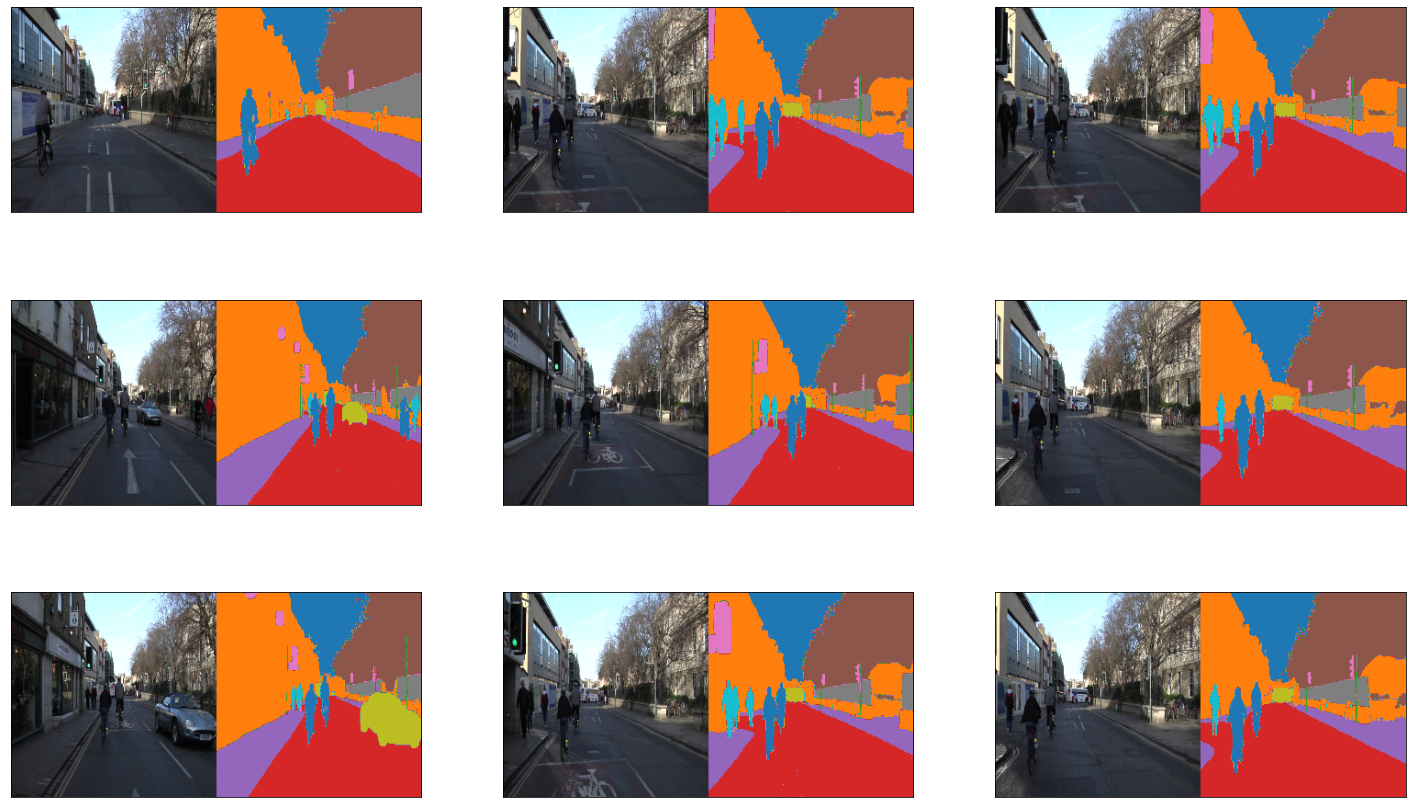

In [6]:
from viz_utils import list_show_annotation

list_show_annotation(valid_dataset)

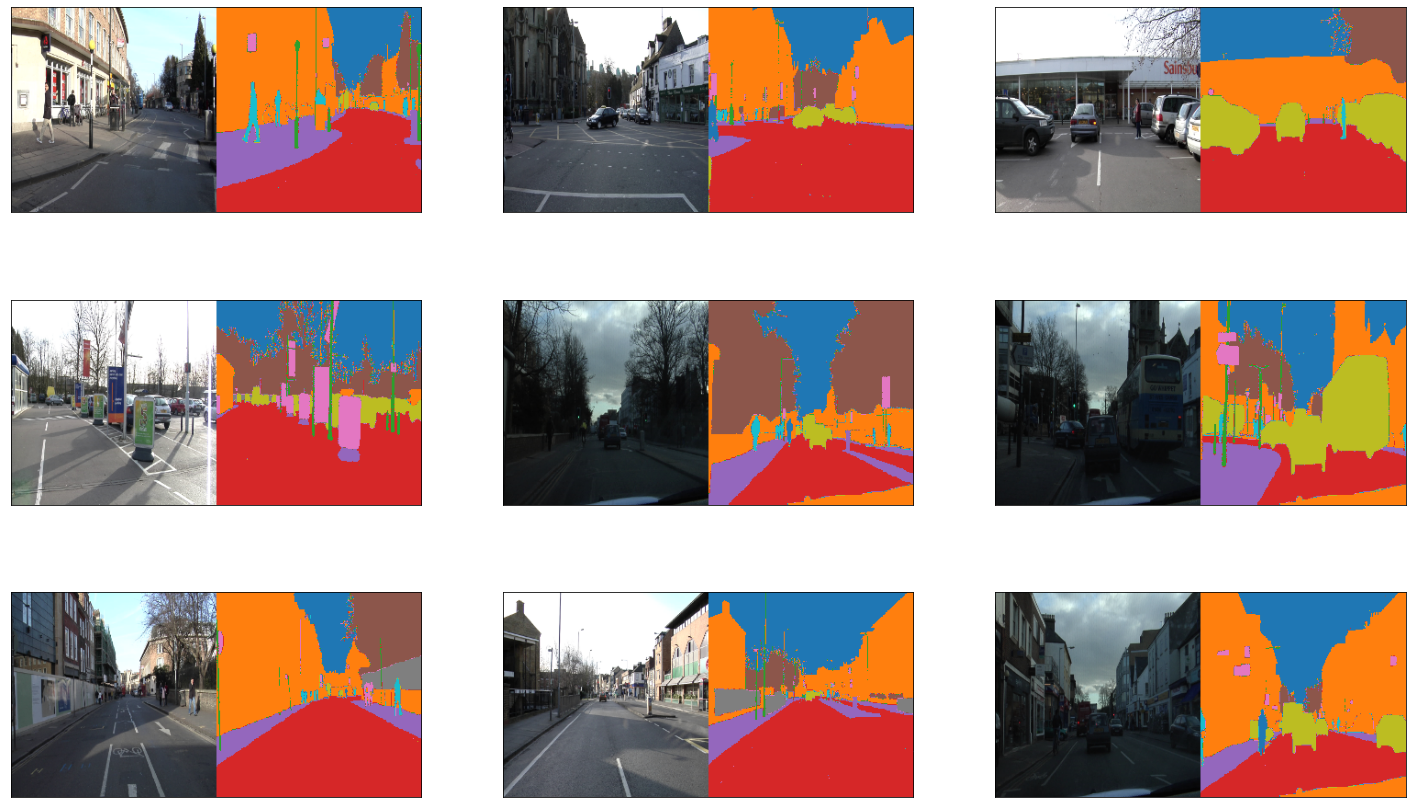

In [7]:
list_show_annotation(train_dataset)

In [8]:
from model_creation import segmentation_model

In [9]:
model = segmentation_model()

In [10]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv0 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv0[0][0]               
__________________________________________________________________________________________________
block1_pool1 (MaxPooling2D)     (None, 112, 112, 64) 0           block1_conv1[0][0]               
_______________________________________________________________________________________

In [7]:
sgd = tf.keras.optimizers.SGD(lr=1E-2, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [9]:
from configuration_file import steps_per_epoch, validation_steps
from configuration_file import EPOCHS

In [14]:
history = model.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch, validation_data=valid_dataset, validation_steps=validation_steps, epochs=EPOCHS)

Epoch 1/170
5/5 [==============================] - 3s 670ms/step - loss: 2.7517 - accuracy: 0.0851 - val_loss: 2.4875 - val_accuracy: 0.0826
Epoch 2/170
5/5 [==============================] - 3s 678ms/step - loss: 2.4864 - accuracy: 0.0830 - val_loss: 2.4857 - val_accuracy: 0.0822
Epoch 3/170
5/5 [==============================] - 4s 779ms/step - loss: 2.4852 - accuracy: 0.0855 - val_loss: 2.4849 - val_accuracy: 0.0893
Epoch 4/170
5/5 [==============================] - 4s 745ms/step - loss: 2.4846 - accuracy: 0.0899 - val_loss: 2.4844 - val_accuracy: 0.0915
Epoch 5/170
5/5 [==============================] - 4s 746ms/step - loss: 2.4841 - accuracy: 0.0925 - val_loss: 2.4838 - val_accuracy: 0.0951
Epoch 6/170
5/5 [==============================] - 4s 742ms/step - loss: 2.4835 - accuracy: 0.0957 - val_loss: 2.4834 - val_accuracy: 0.0980
Epoch 7/170
5/5 [==============================] - 4s 771ms/step - loss: 2.4828 - accuracy: 0.0987 - val_loss: 2.4828 - val_accuracy: 0.1012
Epoch 8/170
5

Epoch 57/170
5/5 [==============================] - 4s 706ms/step - loss: 0.8889 - accuracy: 0.7074 - val_loss: 1.0484 - val_accuracy: 0.6205
Epoch 58/170
5/5 [==============================] - 4s 705ms/step - loss: 0.8877 - accuracy: 0.7062 - val_loss: 1.0216 - val_accuracy: 0.6225
Epoch 59/170
5/5 [==============================] - 4s 754ms/step - loss: 0.8585 - accuracy: 0.7128 - val_loss: 0.9859 - val_accuracy: 0.6338
Epoch 60/170
5/5 [==============================] - 4s 751ms/step - loss: 0.8551 - accuracy: 0.7193 - val_loss: 0.9937 - val_accuracy: 0.6389
Epoch 61/170
5/5 [==============================] - 4s 777ms/step - loss: 0.8458 - accuracy: 0.7253 - val_loss: 0.9752 - val_accuracy: 0.6786
Epoch 62/170
5/5 [==============================] - 4s 760ms/step - loss: 0.8461 - accuracy: 0.7345 - val_loss: 0.9843 - val_accuracy: 0.6465
Epoch 63/170
5/5 [==============================] - 4s 705ms/step - loss: 0.8738 - accuracy: 0.7262 - val_loss: 0.9700 - val_accuracy: 0.6749
Epoch 

In [22]:

# print class name - normalized RGB tuple pairs
# the tuple values will be multiplied by 255 in the helper functions later
# to convert to the (0,0,0) to (255,255,255) RGB values you might be familiar with
for class_name, color in zip(class_names, colors):
  print(f'{class_name} -- {color}')

sky -- (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
building -- (1.0, 0.4980392156862745, 0.054901960784313725)
column/pole -- (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
road -- (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
side walk -- (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
vegetation -- (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
traffic light -- (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
fence -- (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
vehicle -- (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
pedestrian -- (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)
byciclist -- (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
void -- (1.0, 0.4980392156862745, 0.054901960784313725)


In [22]:
from viz_utils import give_color_to_annotation

In [10]:
from test_accuracy_check import get_images_and_segments_test_arrays

In [13]:
# load the ground truth images and segmentation masks
y_true_images, y_true_segments = get_images_and_segments_test_arrays(valid_dataset)

In [14]:
model = tf.keras.models.load_model('first_model.h5')

In [15]:
results = model.predict(valid_dataset, steps=validation_steps)


In [16]:
results =np.argmax(results, axis=3)

In [17]:
from test_accuracy_check import compute_metrics

In [18]:
from viz_utils import show_predictions

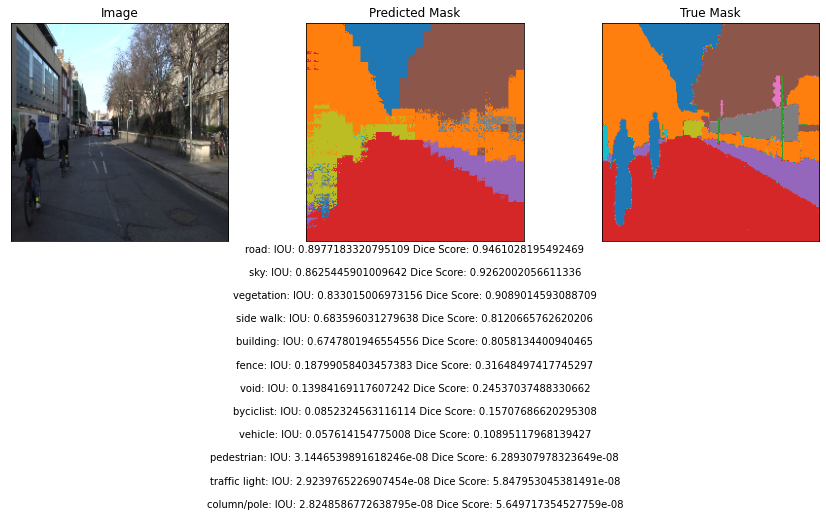

In [19]:
# input a number from 0 to 63 to pick an image from the test set
integer_slider = 0

# compute metrics
iou, dice_score = compute_metrics(y_true_segments[integer_slider], results[integer_slider])  

# visualize the output and metrics
show_predictions(y_true_images[integer_slider], [results[integer_slider], y_true_segments[integer_slider]], ["Image", "Predicted Mask", "True Mask"], iou, dice_score)

In [38]:
cls_wise_iou

[0.8961639890664413,
 0.8037790682004486,
 4.4549382971199104e-10,
 0.8933144000657612,
 0.6869696458677605,
 0.8350815614376205,
 0.00015352995358690393,
 0.15605237299419034,
 0.32743660373411465,
 0.03794804852780872,
 0.035750130894990156,
 0.12854701412932518]

In [39]:
# print IOU for each class
for idx, iou in enumerate(cls_wise_iou):
  spaces = ' ' * (13-len(class_names[idx]) + 2)
  print("{}{}{} ".format(class_names[idx], spaces, iou)) 


sky            0.8961639890664413 
building       0.8037790682004486 
column/pole    4.4549382971199104e-10 
road           0.8933144000657612 
side walk      0.6869696458677605 
vegetation     0.8350815614376205 
traffic light  0.00015352995358690393 
fence          0.15605237299419034 
vehicle        0.32743660373411465 
pedestrian     0.03794804852780872 
byciclist      0.035750130894990156 
void           0.12854701412932518 


In [40]:
# print the dice score for each class
for idx, dice_score in enumerate(cls_wise_dice_score):
  spaces = ' ' * (13-len(class_names[idx]) + 2)
  print("{}{}{} ".format(class_names[idx], spaces, dice_score)) 


sky            0.9452389078678288 
building       0.8912167597189763 
column/pole    8.909876594239821e-10 
road           0.9436514083867972 
side walk      0.8144422130680748 
vegetation     0.9101301860295555 
traffic light  0.0003070127716115029 
fence          0.26997457321510415 
vehicle        0.49333671051254063 
pedestrian     0.07312128693704253 
byciclist      0.06903234638064251 
void           0.22780976340215942 
